# Neuromatch Academy: Week 2, Day 5, Tutorial 1

# VAEs and GANs : Intro to GANs

__Content creators:__ Kai Xu, Seungwook Han, Akash Srivastava.

__Content reviewers:__ Name Surname, Name Surname. 

__Content editors:__ Name Surname, Name Surname.

__Production editors:__ Name Surname, Name Surname.  

---

## Tutorial Objectives

The goal of this tutorial is to introduce GANs training.

By the end of this tutorial you will be able to:
- Understand, at a high level, how GANs are implemented.
- Understand the training dynamics of GANs. 
- Know about a few failure modes of GAN training.

In [1]:
#@markdown Tutorial slides
# you should link the slides for all tutorial videos here (we will store pdfs on osf)

from IPython.display import HTML
HTML('<iframe src="https://docs.google.com/presentation/d/10YzNRq57FdXMaWGQKBHMErOnfqM1ou8Q" frameborder="0" width="960" height="569" allowfullscreen="true" mozallowfullscreen="true" webkitallowfullscreen="true"></iframe>')

---
# Setup

In [2]:
#@title Imports
import numpy as np
import torch
import matplotlib.pyplot as plt

In [3]:
#@title Figure settings
import ipywidgets as widgets       # interactive display
%config InlineBackend.figure_format = 'retina'
plt.style.use("https://raw.githubusercontent.com/NeuromatchAcademy/course-content/master/nma.mplstyle")

In [4]:
#@title Plotting functions

# You may have functions that plot results that aren't 
# particularly interesting. You can add these here to hide them. 

In [5]:
#@title Helper functions

# If any helper functions you want to hide for clarity (that has been seen before
# or is simple/uniformative), add here
# If helper code depends on libraries that aren't used elsewhere,
# import those libaries here, rather than in the main import cell

---

# Section 1: How to train GANs.


Video available at https://youtu.be/aY9ANHYeJfQ


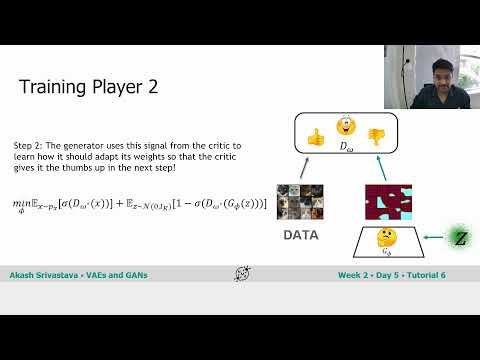

In [6]:
#@title Video 1: Generative Adversarial Networks
# Insert the ID of the corresponding youtube video
from IPython.display import YouTubeVideo
video = YouTubeVideo(id="aY9ANHYeJfQ", width=854, height=480, fs=1)
print("Video available at https://youtu.be/" + video.id)
video

GANs consist two networks: A critic or discriminator (`disc`) and a generator (`gen`) that are trained by alternating between the following two steps:
- In step 1, we update the parameters (`disc.params`) of the discriminator by backpropogating through the discriminator loss (BCE loss) `disc.loss`.
- In step 2, we update the parameters (`gen.params`) of the generator by back propogating throught the generator loss, `gen.loss`.

We will now implement a simple GAN training loop!

## Coding Exercise 1: The GAN training loop.
To get you started we have implemented a simple GAN in pseudocode. All you have to do is to implement the training loop.

__Your goal__ is to arrange the functions given below in the correct order in the `train_gan_iter` function
- `disc.loss(x_real, x_fake)`: Discriminator loss
- `disc.classify(x)`: Classify `x` as real or fake
- `gen.loss(x_fake, disc_fn)`: Generator loss
- `disc_fn(x)` is a function to check `x` is real or fake.
- `gen.sample(num_samples)`: Generate samples from the generator
- `backprop(loss, model)`: Compute gradient of `loss` wrt `model`
- `model` is either `disc` or `gen`

We have already taken care of most of these functions. So you only have to figure out the placement of `disc.loss` and `gen.loss` functions.

<!-- Note that this `train_gan_iter` is designed to give a propoer overview of the trianing loop of GANs rather than actually being functional in this notebook. -->

In [7]:
# @markdown *Execute this cell to enable helper functions*

def get_data():
  return "get_data"

class Disc:
  def loss(self, x_real, x_fake):
    assert x_real == "get_data" and x_fake == "gen.sample", "Inputs to disc.loss is wrong"
  def classify(self, x):
    return "disc.classify"

class Gen:
  def loss(self, x_fake, disc_fn):
    assert x_fake == "gen.sample" and disc_fn(None) == "disc.classify", "Inputs to gen.loss is wrong"
  def sample(self, num_samples):
    return "gen.sample"

def backprop(loss, model):
  pass

def update(model, grad):
  pass

In [8]:
def train_gan_iter(data, disc, gen):
  """Update the discriminator (`disc`) and the generator (`gen`) using `data`
  
  Args:
    data (ndarray): An array of shape (N,) that contains the data
    disc (Disc): The discriminator
    gen (Gen): The generator

  Returns:
  """
  #################################################
  # Intructions for students:                            #
  # Fill out [TODO] in the function and remove below #
  #################################################
  
  # Number of samples in the data batch
  num_samples = 200

  # The data is the real samples
  x_real = data

  ## Discriminator trianing

  # Ask the generator to generate some fake samples
  x_fake = gen.sample(num_samples)

  # Compute the discriminator loss
  disc_loss = ...
  raise NotImplementedError("Student exercise: Write code to compute disc_loss")

  # Compute the gradient for discriminator
  disc_grad = backprop(disc_loss, disc)

  # Update the discriminator
  update(disc, disc_grad)

  ## Generator trianing

  # Ask the generator to generate some fake samples
  x_fake = gen.sample(num_samples)

  # Compute the generator loss
  gen_loss = ...
  raise NotImplementedError("Student exercise: Write code to compute gen_loss")

  # Compute the gradient for generator
  gen_grad = backprop(gen_loss, gen)

  # Update the generator
  update(gen, gen_grad)

In [9]:
# to_remove solution
def train_gan_iter(data, disc, gen):
  """Update the discriminator (`disc`) and the generator (`gen`) using `data`
  
  Args:
    data (ndarray): An array of shape (N,) that contains the data
    disc (Disc): The discriminator
    gen (Gen): The generator

  Returns:
  """
  
  # Number of samples in the data batch
  num_samples = 200

  # The data is the real samples
  x_real = data

  ## Discriminator trianing

  # Ask the generator to generate some fake samples
  x_fake = gen.sample(num_samples)

  # Compute the discriminator loss
  disc_loss = disc.loss(x_real, x_fake)

  # Compute the gradient for discriminator
  disc_grad = backprop(disc_loss, disc)

  # Update the discriminator
  update(disc, disc_grad)

  ## Generator trianing

  # Ask the generator to generate some fake samples
  x_fake = gen.sample(num_samples)

  # Compute the generator loss
  gen_loss = gen.loss(x_fake, disc.classify)

  # Compute the gradient for generator
  gen_grad = backprop(gen_loss, gen)

  # Update the generator
  update(gen, gen_grad)

In [10]:
data = get_data()
disc = Disc()
gen = Gen()

train_gan_iter(data, disc, gen)

print("Your implementation passes the check!")

Your implementation passes the check!


---

# Section 2: The difficulty of GAN trianing

In this section we will develop an intuition for the training dynamics of GANs. 

# Interactive Demo 1: Failure modes of GAN trianing

GAN training is notoriously difficult because 
it is very sensitive to hyper-parameters such form learning rate to model architecture. To help you develop a sense of this, here is a very simple GAN training demo that we have borrowed from Andrej Karpathy's website.  

Even though the GAN in this demo is very simple and operates in either 1D or 2D spaces, it is however very sensitive to the learning rate. Try it for yourself!

In [11]:
#@title GAN training demo
#@markdown Make sure you execute this cell to enable the widget!

from IPython.display import IFrame
IFrame(src='https://xukai92.github.io/gan_demo/index.html', width=900, height=600)

# What makes GANs hard to train?

You have played with the demo and it's time to think about a few questions

1. Which target is more stable to train, 1D or 2D?
2. If you keep increasing the learning rate, what happens? Does it happen in both the cases i.e. 1D/2D targets?
3. Can you think of some drawbacks of using small learning rates?

---
# Summary

Through this tutorial, we have learned

- How to implement the training loop of GANs and,
- Developed an intuition about the training dynamics of GANs 